In [1]:
# Importing modules
import pandas as pd
import os
import numpy as np
import re


os.chdir('..')

# Read data into papers
papers = pd.read_csv('D:\Anaconda\python\scopus1.csv')

# Print head
papers.head()

,Authors,Author full names,Author(s) ID,Year,Source title,DOI,Link,Affiliations,Authors with affiliations,Abstract,Indexed Keywords,Author Keywords,Document Type,Source
0,Fitzgerald K.; Devonshire E.; Vaughan B.,"Fitzgerald, Kylie (23990834600); Devonshire, E...",23990834600; 54994531800; 16235143200,2020,Health Professions Education,10.1016/j.hpe.2020.09.001,https://www.scopus.com/inward/record.uri?eid=2...,"The Pain Management Research Institute, Sydney...","Fitzgerald K., The Pain Management Research In...",Purpose: The global burden of pain is consider...,NaN,Attitudes; Back pain; Curriculum; Education; O...,Article,Scopus
1,NaN,NaN,NaN,2020,Hematology. American Society of Hematology. Ed...,10.1182/hematology.2020Erratum1,https://www.scopus.com/inward/record.uri?eid=2...,NaN,NaN,[No abstract available],erratum,NaN,Erratum,Scopus
2,Gembris H.; Menze J.; Heye A.; Bullerjahn C.,"Gembris, Heiner (56404579500); Menze, Jonas (5...",56404579500; 57219867409; 57211967141; 5644582...,2020,Frontiers in Psychology,10.3389/fpsyg.2020.564736,https://www.scopus.com/inward/record.uri?eid=2...,"Faculty of Cultural Studies, Institute for Res...","Gembris H., Faculty of Cultural Studies, Insti...","The present study examines the prevalence, loc...",NaN,adolescents; high performers; music education;...,Article,Scopus
3,Kim S.-W.,"Kim, Seong-Woo (54399892700)",54399892700,2020,Proceedings of 2020 IEEE International Confere...,10.1109/TALE48869.2020.9368332,https://www.scopus.com/inward/record.uri?eid=2...,"Seoul National University, Graduate School of ...","Kim S.-W., Seoul National University, Graduate...",The fundamentally-required literacy in higher ...,Computer programming; Machine learning; Studen...,Artificial intelligence; Engineering literacy;...,Conference paper,Scopus
4,Benedicto J.; Echaves A.; Jurado T.; Ramos M.;...,"Benedicto, Jorge (6603612542); Echaves, Antoni...",6603612542; 57222029480; 57191157882; 57203283...,2020,Revista Espanola de Sociologia,10.22325/FES/RES.2020.78,https://www.scopus.com/inward/record.uri?eid=2...,"Universidad Nacional de Educación a Distancia,...","Benedicto J., Universidad Nacional de Educació...",Based on the results of a survey carried out i...,NaN,Crisis; Emancipation; Precariousness; Youth,Review,Scopus


In [2]:
papers.shape

(1000, 14)

In [3]:
# Remove the columns
Papers = papers.drop(columns=['Author(s) ID', 'Link', 'Author full names','DOI','Document Type','Source'], axis=1).sample(1000)

# Print out the first rows of papers
Papers.head()

,Authors,Year,Source title,Affiliations,Authors with affiliations,Abstract,Indexed Keywords,Author Keywords
451,Newman J.D.; Bhatt D.L.; Rajagopalan S.; Balme...,2020,Journal of the American College of Cardiology,Division of Cardiology and the Center for the ...,"Newman J.D., Division of Cardiology and the Ce...",Fine particulate air pollution <2.5 μm in diam...,Air Pollution; Clinical Trials as Topic; Educa...,cardiopulmonary disease; cardiovascular diseas...
588,Antipov D.V.; Kuznetsova E.Y.; Aytasova A.,2020,IOP Conference Series: Materials Science and E...,Samara National Research University Academicia...,"Antipov D.V., Samara National Research Univers...",The relevance of the problem is due to the fac...,NaN,NaN
698,Pratiwi H.; Andreas E.; Paryanto P.; Wijayanti...,2020,Journal of Physics: Conference Series,Department of Mechanical Engineering Education...,"Pratiwi H., Department of Mechanical Engineeri...",This study has been conducted in order to prod...,Apprentices; Students; Surveys; Feasibility te...,NaN
368,Li Y.,2020,Proceedings - 2020 5th International Conferenc...,"Fuzhou Preschool Education College, Fuzhou, Ji...","Li Y., Fuzhou Preschool Education College, Fuz...",Because English is a subject with strong appli...,Curricula; Information management; Curriculum ...,Curriculum reform; Information management; Mul...
687,Herman; Purba R.; Thao N.V.; Purba A.,2020,Journal of Education and e-Learning Research,"English Education Department, Universitas HKBP...","Herman, English Education Department, Universi...",Because of the importance of the English langu...,NaN,GBA; Strategy; Teaching; Text; Tutorial; Writi...


In [4]:
Papers.isnull().sum()

Authors                        7
Year                           0
Source title                   0
Affiliations                  12
Authors with affiliations     12
Abstract                       0
Indexed Keywords             404
Author Keywords              202
dtype: int64

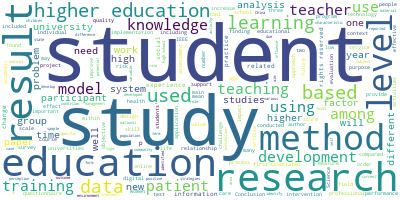

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(Papers['Abstract'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stop_words.extend(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
                   'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
                   'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
                   'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
                   'into', 'through', 'during', 'before', 'after', 'above', 
                   'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 
                   'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
                   "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
                   'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = Papers.Abstract.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['fine', 'particulate', 'air', 'pollution', 'μm', 'diameter', 'pm', 'major', 'environmental', 'threat', 'global', 'public', 'health', 'multiple', 'national', 'international', 'medical', 'governmental', 'organizations', 'recognized', 'pm', 'risk', 'factor', 'cardiopulmonary', 'diseases', 'growing', 'body', 'evidence', 'indicates', 'several']


In [8]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [9]:
#Model traning
from pprint import pprint

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"education" + 0.009*"study" + 0.007*"students" + 0.006*"level" + '
  '0.006*"research" + 0.005*"high" + 0.005*"results" + 0.004*"patients" + '
  '0.004*"teachers" + 0.004*"higher"'),
 (1,
  '0.013*"learning" + 0.012*"students" + 0.008*"education" + 0.008*"study" + '
  '0.006*"research" + 0.005*"used" + 0.005*"higher" + 0.004*"design" + '
  '0.004*"teaching" + 0.004*"development"'),
 (2,
  '0.014*"education" + 0.008*"students" + 0.007*"study" + 0.007*"higher" + '
  '0.006*"results" + 0.006*"high" + 0.005*"factors" + 0.005*"educational" + '
  '0.004*"health" + 0.004*"university"'),
 (3,
  '0.010*"students" + 0.009*"education" + 0.006*"higher" + 0.005*"health" + '
  '0.005*"study" + 0.004*"based" + 0.004*"high" + 0.004*"social" + '
  '0.004*"level" + 0.004*"knowledge"'),
 (4,
  '0.017*"education" + 0.013*"students" + 0.008*"higher" + 0.008*"learning" + '
  '0.007*"study" + 0.006*"teaching" + 0.005*"high" + 0.005*"teachers" + '
  '0.004*"results" + 0.004*"training"'),
 (5,
  

In [12]:
import pyLDAvis.gensim as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('D:\Anaconda\python'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'D:\Anaconda\python'+ str(num_topics) +'.html')

LDAvis_prepared

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence \A
<>:21: DeprecationWarning: invalid escape sequence \A
<>:8: DeprecationWarning: invalid escape sequence \A
<>:21: DeprecationWarning: invalid escape sequence \A
<ipython-input-12-2bdeb95bdd03>:8: DeprecationWarning: invalid escape sequence \A
  LDAvis_data_filepath = os.path.join('D:\Anaconda\python'+str(num_topics))
<ipython-input-12-2bdeb95bdd03>:21: DeprecationWarning: invalid escape sequence \A
  pyLDAvis.save_html(LDAvis_prepared, 'D:\Anaconda\python'+ str(num_topics) +'.html')


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.000441 -0.005167       1        1  16.147415
7     -0.018984  0.020896       2        1   8.083430
6     -0.027716 -0.021590       3        1   8.009241
2     -0.006240 -0.011147       4        1   7.575130
4     -0.030668 -0.010439       5        1   6.840593
10    -0.005957 -0.007166       6        1   6.559631
8     -0.011284 -0.006184       7        1   5.624670
1     -0.020466  0.018599       8        1   5.513361
12     0.021282  0.012264       9        1   4.560219
19     0.059339 -0.011161      10        1   4.198060
3      0.012564 -0.016236      11        1   3.416281
15     0.014682  0.051235      12        1   3.413700
17    -0.017679 -0.028122      13        1   3.401690
11    -0.014632  0.017729      14        1   3.009781
0      0.028898 -0.010349      15        1   2.749350
18    -0.019391 -0.008714      16        1   2.658896
9      0.009603  0.035693      17        1   2.624181
13    -0.009283  0.007434      18        1   2.133961
5      0.004923 -0.000502      19        1   1.789271
16     0.031449 -0.027073      20        1   1.691140, topic_info=          Term         Freq        Total Category  logprob  loglift
301   students  1370.000000  1370.000000  Default  30.0000  30.0000
302      study  1265.000000  1265.000000  Default  29.0000  29.0000
284   learning   848.000000   848.000000  Default  28.0000  28.0000
141  education  1602.000000  1602.000000  Default  27.0000  27.0000
370     higher   860.000000   860.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
230   research     6.872099   752.668828  Topic20  -5.9014  -0.6164
483     design     5.257520   288.232473  Topic20  -6.1692   0.0757
269       also     5.432720   365.423670  Topic20  -6.1364  -0.1289
348    authors     4.994954   221.535323  Topic20  -6.2204   0.2876
276       data     5.537431   549.560102  Topic20  -6.1173  -0.5178

[1617 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4756      3  0.145815  absolute
4756      4  0.145815  absolute
4756      8  0.145815  absolute
4756      9  0.145815  absolute
4756     20  0.145815  absolute
...     ...       ...       ...
5005     12  0.023141      yuan
5005     15  0.046281      yuan
5005     16  0.462811      yuan
5005     17  0.046281      yuan
5005     19  0.046281      yuan

[6236 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 8, 7, 3, 5, 11, 9, 2, 13, 20, 4, 16, 18, 12, 1, 19, 10, 14, 6, 17])